In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_csv(r"C:\Users\ashwa\Downloads\Add_sales_data_2018.csv")
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


### 1. Relationship between the amount spent for advertising through five different companies and profit generated.

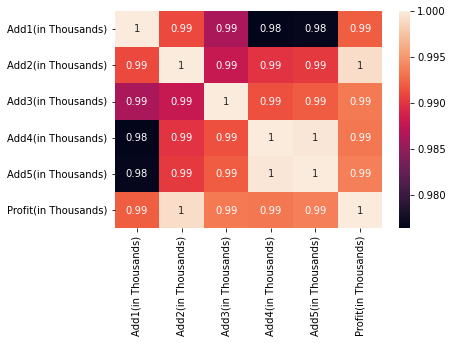

In [35]:
ax = sns.heatmap(df.corr(), annot=True)

The correlation of profit with the add amounts is displayed throught the heatmap. As seen,  the amount spent is highly correlated to the profit.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [36]:
y=df['Profit(in Thousands)']
x=df.drop(['Profit(in Thousands)','Date'],axis=1)

In [37]:
x.shape


(205, 5)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.7)

In [39]:
lr = linear_model.LinearRegression()

In [40]:
model = lr.fit(x_train,y_train)

In [41]:
predictions = model.predict(x_test)

In [42]:
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457, 4887.296, 5805.521,
       4705.198, 4404.686, 5465.277, 4947.72 , 5185.639, 5225.14 ,
       5111.806, 5518.561, 5910.98 , 5163.693, 5866.196, 4617.695,
       4464.11 , 4419.421, 5153.977, 4432.864, 5137.534, 4915.682,
       5250.15 , 4477.226, 5373.275, 5245.14 , 4453.205, 5244.097,
       5057.155, 5227.886, 4451.999, 5051.755, 5374.105, 5359.346,
       4213.819, 5187.445, 4558.651, 5167.878, 5188.139, 4923.

In [43]:
print('MSE is :',mean_squared_error(y_test,predictions))

MSE is : 9.937655970255124e-25


In [44]:
df3 = pd.DataFrame(data={'Predicted value':predictions,'Actual Value':y_test})
df3

,Predicted value,Actual Value
15,4152.066,4152.066
9,4446.441,4446.441
100,5131.898,5131.898
132,4907.560,4907.560
68,5004.282,5004.282
...,...,...
142,5163.322,5163.322
3,4391.665,4391.665
105,5511.420,5511.420
53,4605.783,4605.783


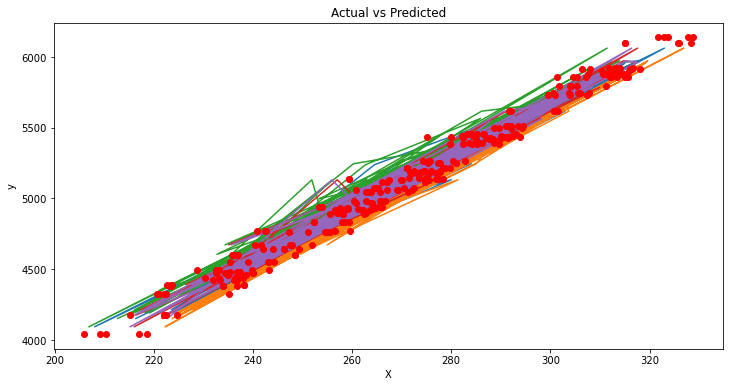

In [45]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test)     # regression line
plt.plot(x_train, y_train, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

### 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [46]:
new_profit = np.array([[219],[312],[309],[298],[320]]).reshape(1,5)
profit1 = model.predict(new_profit)

C:\Users\ashwa\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
profit1[0]

5749.060000000003

Thus the new profit for the given data is 5749.06